## Load metadata

In [17]:
import pandas as pd

metadata_path = '/content/drive/MyDrive/cse151a_groupProject/isic-2024-challenge/train-metadata.csv'
isic_2020_path = '/content/drive/MyDrive/cse151a_groupProject/CSE_151A_Project_Data /ISIC_2020/ISIC2020_Training_labels.csv'
isic_2019_path = '/content/drive/MyDrive/cse151a_groupProject/CSE_151A_Project_Data /ISIC_2019/ISIC2019_Training_labels.csv'
isic_2018_path = '/content/drive/MyDrive/cse151a_groupProject/CSE_151A_Project_Data /ISIC_2018/ISIC2018_Training_labels.csv'
isic_2017_path = '/content/drive/MyDrive/cse151a_groupProject/CSE_151A_Project_Data /ISIC_2017/ISIC2017_Training_labels.csv'
isic_2016_path = '/content/drive/MyDrive/cse151a_groupProject/CSE_151A_Project_Data /ISIC_2016/ISBI2016_Training_labels.csv'

metadata = pd.read_csv(metadata_path)
isic_2020 = pd.read_csv(isic_2020_path)
isic_2019 = pd.read_csv(isic_2019_path)
isic_2018 = pd.read_csv(isic_2018_path)
isic_2017 = pd.read_csv(isic_2017_path)
isic_2016 = pd.read_csv(isic_2016_path)

isic_2020 = isic_2020[['image_name', 'target']]
isic_2020.rename(columns={'image_name': 'isic_id'}, inplace=True)

isic_2019 = isic_2019[['image', 'MEL']]
isic_2019.rename(columns={'image': 'isic_id', 'MEL': 'target'}, inplace=True)

isic_2018 = isic_2018[['image', 'MEL']]
isic_2018.rename(columns={'image': 'isic_id', 'MEL': 'target'}, inplace=True)

isic_2017 = isic_2017[['image_id', 'melanoma']]
isic_2017.rename(columns={'image_id': 'isic_id', 'melanoma': 'target'}, inplace=True)

isic_2016.columns = ['isic_id', 'target']
isic_2016['target'] = isic_2016['target'].map({'malignant': 1, 'benign': 0})

combined_metadata = pd.concat([metadata, isic_2020, isic_2019, isic_2018, isic_2017, isic_2016], ignore_index=True)

combined_metadata['tbp_lv_area_perim_ratio'].fillna(combined_metadata['tbp_lv_area_perim_ratio'].mean(), inplace=True)
combined_metadata['clin_size_long_diam_mm'].fillna(combined_metadata['clin_size_long_diam_mm'].mean(), inplace=True)


<ipython-input-17-8d64c9eef9a4>:10: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(metadata_path)


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

features = ['tbp_lv_area_perim_ratio', 'clin_size_long_diam_mm']
target_variable = 'target'

X = combined_metadata[features].values
y = combined_metadata[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]
mse = mean_squared_error(y_test, y_pred_prob)

print(f"\nMean Squared Error: {mse}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Mean Squared Error: 0.01479167381424895
Confusion Matrix:
[[93067     0]
 [ 1419     0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     93067
         1.0       0.00      0.00      0.00      1419

    accuracy                           0.98     94486
   macro avg       0.49      0.50      0.50     94486
weighted avg       0.97      0.98      0.98     94486



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


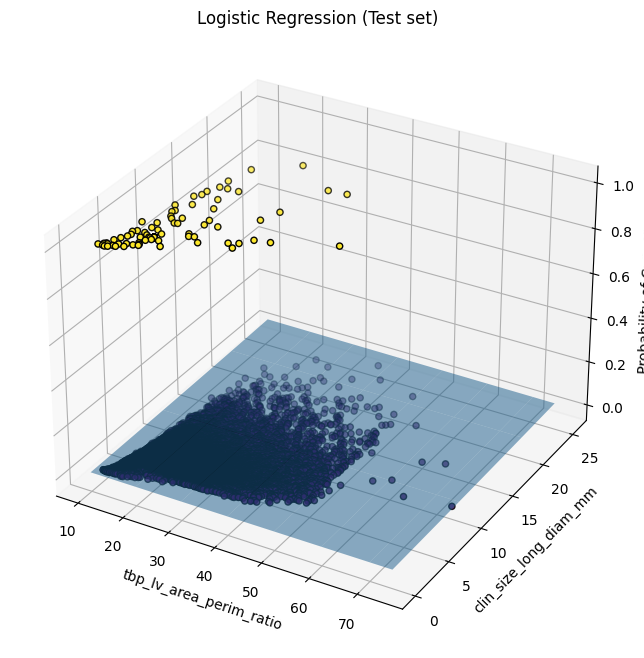

In [19]:
def plot_3d_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict_proba(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1]
    Z = Z.reshape(xx.shape)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, alpha=0.5, rstride=100, cstride=100)
    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel('Probability of Cancerous')
    plt.show()

plot_3d_decision_boundary(X_test, y_test, logreg, 'Logistic Regression (Test set)')


chatgpt usage: "how to perform logistic regression using two features"
"how to use 3d plots with logistic regression"
